In [1]:
from autogluon.tabular import TabularPredictor

from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, \
    precision_score, recall_score, top_k_accuracy_score, \
    confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)
plt.rcParams['font.family'] = 'Arial'

## 1. Evaluate on test data for 5 class
- `sp_mode`: `s` (only use substrate concentration)
- `feat`: `tsfresh_raw` (use both tsfresh features and raw data)
- `ag_train_quality`: `best_quality` (use `best_quality` present in Autogluon training)
- `hours`: `3` (train for 3 hours)

In [2]:
class_list = [
    'zero',
    'mm_1',
    # 'mm_1_out',
    'first',
    'mm_2',
    'second',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 29

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

In [3]:
# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

model  score_val eval_metric  pred_time_val  \
0             LightGBMXT_BAG_L2   0.789289    accuracy      79.722370   
1           WeightedEnsemble_L3   0.789289    accuracy      79.724925   
2               LightGBM_BAG_L2   0.788400    accuracy      79.718908   
3          LightGBM_r131_BAG_L2   0.788400    accuracy      79.834509   
4            XGBoost_r33_BAG_L2   0.788244    accuracy      80.522486   
5          LightGBMLarge_BAG_L2   0.787911    accuracy      79.703552   
6                XGBoost_BAG_L2   0.787667    accuracy      80.267064   
7       RandomForestEntr_BAG_L2   0.786822    accuracy      83.860130   
8            CatBoost_r9_BAG_L2   0.786756    accuracy      79.426028   
9           LightGBM_r96_BAG_L2   0.786622    accuracy      79.986941   
10        ExtraTrees_r42_BAG_L2   0.786489    accuracy      83.669920   
11        ExtraTreesEntr_BAG_L2   0.786200    accuracy      83.985464   
12        ExtraTreesGini_BAG_L2   0.786044    accuracy      84.072935   
13      RandomForestGini_BAG_L2   0.785311    accuracy      84.121233   
14          WeightedEnsemble_L2   0.785111    accuracy      51.688603   
15              CatBoost_BAG_L2   0.785044    accuracy      79.395862   
16       NeuralNetFastAI_BAG_L2   0.784200    accuracy      79.746230   
17         CatBoost_r177_BAG_L2   0.784000    accuracy      79.404453   
18  NeuralNetFastAI_r191_BAG_L2   0.783733    accuracy      79.970429   
19        NeuralNetTorch_BAG_L2   0.783356    accuracy      81.283781   
20         CatBoost_r137_BAG_L2   0.783267    accuracy      79.414590   
21  NeuralNetFastAI_r102_BAG_L2   0.782933    accuracy      79.601619   
22    NeuralNetTorch_r22_BAG_L2   0.781978    accuracy      81.328442   
23    NeuralNetTorch_r79_BAG_L2   0.781689    accuracy      81.301759   
24         LightGBMLarge_BAG_L1   0.781622    accuracy       3.574393   
25          CatBoost_r13_BAG_L2   0.781578    accuracy      79.388573   
26           XGBoost_r33_BAG_L1   0.780600    accuracy       3.017466   
27         LightGBM_r131_BAG_L1   0.779289    accuracy       6.745958   
28          LightGBM_r96_BAG_L1   0.779111    accuracy      22.253675   
29            LightGBMXT_BAG_L1   0.778133    accuracy       3.285051   
30               XGBoost_BAG_L1   0.777711    accuracy       1.176131   
31              LightGBM_BAG_L1   0.777511    accuracy       1.795795   
32      RandomForestEntr_BAG_L1   0.775489    accuracy       3.640016   
33      RandomForestGini_BAG_L1   0.774578    accuracy       3.718603   
34           CatBoost_r9_BAG_L1   0.773911    accuracy       0.160900   
35        ExtraTrees_r42_BAG_L1   0.773911    accuracy       3.697019   
36         CatBoost_r177_BAG_L1   0.771356    accuracy       0.166540   
37              CatBoost_BAG_L1   0.771111    accuracy       0.167024   
38        ExtraTreesGini_BAG_L1   0.770089    accuracy       3.842881   
39        ExtraTreesEntr_BAG_L1   0.768867    accuracy       3.791640   
40        NeuralNetTorch_BAG_L1   0.766422    accuracy       1.226202   
41         CatBoost_r137_BAG_L1   0.766022    accuracy       0.168260   
42    NeuralNetTorch_r22_BAG_L1   0.765489    accuracy       1.267354   
43    NeuralNetTorch_r79_BAG_L1   0.760711    accuracy       1.238585   
44  NeuralNetFastAI_r102_BAG_L1   0.757933    accuracy       0.302395   
45       NeuralNetFastAI_BAG_L1   0.756444    accuracy       0.441813   
46  NeuralNetFastAI_r191_BAG_L1   0.752422    accuracy       0.608822   
47          CatBoost_r13_BAG_L1   0.700644    accuracy       0.100695   
48        KNeighborsDist_BAG_L1   0.609244    accuracy       6.407898   
49        KNeighborsUnif_BAG_L1   0.607089    accuracy       6.461211   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   5363.749647                0.466044          44.597346            2   
1   5365.443726                0.002555           1.694078            3   
2   5390.888847                0.462582          71.736545            2   
3 

In [4]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [5]:
# show performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_proba, multi_class="ovr"):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Top-2 accuracy: {top_k_accuracy_score(y_test, y_proba, k=2):.4f}')
print(f'Top-3 accuracy: {top_k_accuracy_score(y_test, y_proba, k=3):.4f}')
print('================================')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7882
ROC_AUC: 0.9642
MCC: 0.7359
F1: 0.7861
Precision: 0.7867
Recall: 0.7882
Top-2 accuracy: 0.9576
Top-3 accuracy: 0.9970
Classification report:
              precision    recall  f1-score   support

       first       0.77      0.80      0.78      1000
        mm_1       0.84      0.75      0.79      1000
        mm_2       0.70      0.66      0.68      1000
      second       0.77      0.78      0.77      1000
        zero       0.86      0.96      0.91      1000

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



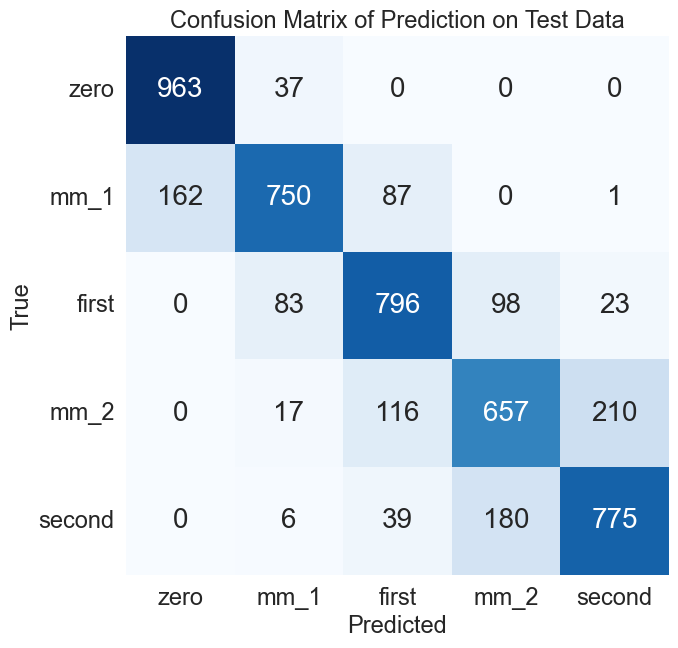

In [6]:
# show confusion matrix
plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(y_test, y_pred, labels=class_list)
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False)
tick_marks = np.arange(len(class_list)) + 0.5
if class_num == 6:
    class_list = ['zero', 'mm_1', 'mm_1\'', 'first', 'mm_2', 'second']
plt.xticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.yticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('True', fontsize=17)
plt.title(f'Confusion Matrix of Prediction on Test Data', fontsize=17)
plt.show()

# plt.savefig(f'./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png', bbox_inches='tight')
# print(f'Confusion matrix saved at ./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png')

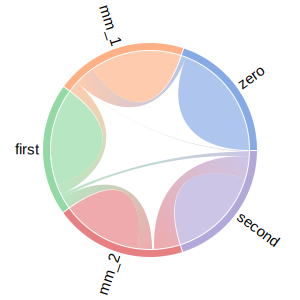

<Figure size 600x600 with 0 Axes>

In [7]:
# show chord diagram
import openchord as ocd

plt.figure(figsize=(6, 6))
fig = ocd.Chord(cm, class_list, radius=100)
fig.font_size = 15

fig.colormap = ['#79A1E3', '#FFA878', '#88D59A', '#E37275', '#AB9FD6']

fig.show()

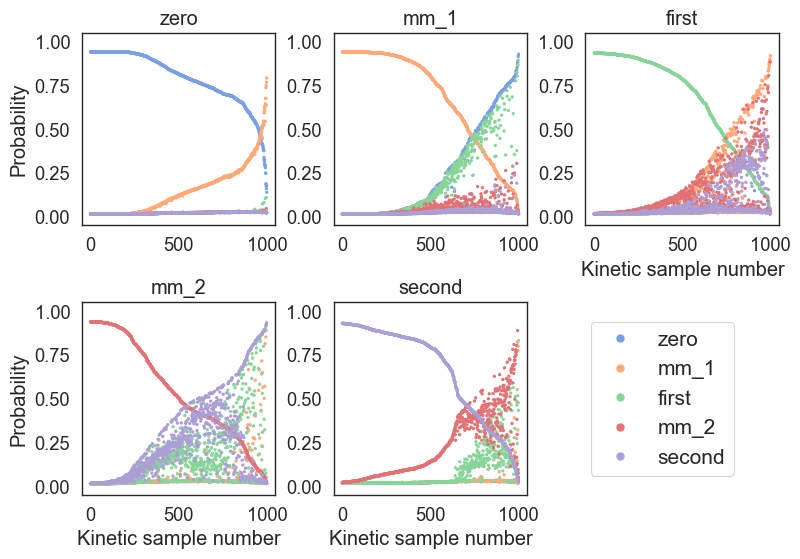

In [8]:
y_proba = y_proba[['zero', 'mm_1', 'first', 'mm_2', 'second']]
y_proba['class'] = test_merge_data['class']

def plot_scatter_figs(data, ax):
    sns.scatterplot(data=data['zero'], ax=ax, legend=False, marker='.', edgecolor='none', color='#79A1E3')
    sns.scatterplot(data=data['mm_1'], ax=ax, legend=False, marker='.', edgecolor='none', color='#FFA878')
    sns.scatterplot(data=data['first'], ax=ax, legend=False, marker='.', edgecolor='none', color='#88D59A')
    sns.scatterplot(data=data['mm_2'], ax=ax, legend=False, marker='.', edgecolor='none', color='#E37275')
    sns.scatterplot(data=data['second'], ax=ax, legend=False, marker='.', edgecolor='none', color='#AB9FD6')

# 5 figs
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten() 
from matplotlib.lines import Line2D

# zero
df_zero = y_proba[y_proba['class'] == 'zero']
df_zero = df_zero.sort_values(by=['zero', 'mm_1', 'first', 'mm_2', 'second'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_zero, axes[0])
axes[0].set_title('zero')

# mm_1
df_mm_1 = y_proba[y_proba['class'] == 'mm_1']
df_mm_1 = df_mm_1.sort_values(by=['mm_1', 'first', 'mm_2', 'second', 'zero'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_1, axes[1])
axes[1].set_title('mm_1')

# first
df_first = y_proba[y_proba['class'] == 'first']
df_first = df_first.sort_values(by=['first', 'mm_2', 'second', 'zero', 'mm_1'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_first, axes[2])
axes[2].set_title('first')

# mm_2
df_mm_2 = y_proba[y_proba['class'] == 'mm_2']
df_mm_2 = df_mm_2.sort_values(by=['mm_2', 'second', 'zero', 'mm_1', 'first'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_2, axes[3])
axes[3].set_title('mm_2')

# second
df_second = y_proba[y_proba['class'] == 'second']
df_second = df_second.sort_values(by=['second', 'zero', 'mm_1', 'first', 'mm_2'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_second, axes[4])
axes[4].set_title('second')


axes[-1].axis('off')
custom_handles = [
    Line2D([0], [0], color='#79A1E3', marker='.', markersize=10, linestyle='none', label='zero'),
    Line2D([0], [0], color='#FFA878', marker='.', markersize=10, linestyle='none', label='mm_1'),
    Line2D([0], [0], color='#88D59A', marker='.', markersize=10, linestyle='none', label='first'),
    Line2D([0], [0], color='#E37275', marker='.', markersize=10, linestyle='none', label='mm_2'),
    Line2D([0], [0], color='#AB9FD6', marker='.', markersize=10, linestyle='none', label='second')
]
fig.legend(
    handles=custom_handles,
    loc='center',
    bbox_to_anchor=(0.72, 0.22, 0.1, 0.1),
    fontsize=15,
)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
# ylim
for ax in axes[:-1]:
    ax.set_ylim(-0.05, 1.05)
# no ylabel
for ax in axes[0:-1]:
    ax.set_ylabel('')
axes[0].set_ylabel('Probability')
axes[3].set_ylabel('Probability')
for ax in axes[2:-1]:
    ax.set_xlabel('Kinetic sample number')

## 2. Evaluate on test data for 6 class
- `sp_mode`: `s` (only use substrate concentration)
- `feat`: `tsfresh_raw` (use both tsfresh features and raw data)
- `ag_train_quality`: `best_quality` (use `best_quality` present in Autogluon training)
- `hours`: `3` (train for 3 hours)

In [9]:
class_list = [
    'zero',
    'mm_1',
    'mm_1_out',
    'first',
    'mm_2',
    'second',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 29

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

In [10]:
# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

model  score_val eval_metric  pred_time_val  \
0          LightGBMLarge_BAG_L2   0.759093    accuracy      72.347625   
1           WeightedEnsemble_L3   0.759093    accuracy      72.350704   
2          LightGBM_r131_BAG_L2   0.759000    accuracy      72.135333   
3               LightGBM_BAG_L2   0.758778    accuracy      72.108226   
4             LightGBMXT_BAG_L2   0.758574    accuracy      72.171059   
5                XGBoost_BAG_L2   0.758407    accuracy      72.589012   
6            XGBoost_r33_BAG_L2   0.757852    accuracy      72.600745   
7           LightGBM_r96_BAG_L2   0.757722    accuracy      72.990031   
8         ExtraTreesEntr_BAG_L2   0.755815    accuracy      76.712028   
9       RandomForestEntr_BAG_L2   0.755778    accuracy      76.514901   
10      RandomForestGini_BAG_L2   0.755667    accuracy      76.588171   
11       NeuralNetFastAI_BAG_L2   0.755537    accuracy      72.102109   
12           CatBoost_r9_BAG_L2   0.755259    accuracy      71.678666   
13              CatBoost_BAG_L2   0.754852    accuracy      71.683929   
14        ExtraTreesGini_BAG_L2   0.754667    accuracy      76.731989   
15         CatBoost_r177_BAG_L2   0.754074    accuracy      71.693483   
16          WeightedEnsemble_L2   0.753741    accuracy      31.992821   
17  NeuralNetFastAI_r191_BAG_L2   0.753167    accuracy      72.312832   
18        NeuralNetTorch_BAG_L2   0.752537    accuracy      73.741328   
19    NeuralNetTorch_r79_BAG_L2   0.752278    accuracy      73.750673   
20         CatBoost_r137_BAG_L2   0.750296    accuracy      71.639220   
21    NeuralNetTorch_r22_BAG_L2   0.749944    accuracy      73.800757   
22         LightGBMLarge_BAG_L1   0.749519    accuracy       4.841804   
23        ExtraTrees_r42_BAG_L2   0.749037    accuracy      73.038692   
24         LightGBM_r131_BAG_L1   0.748926    accuracy      10.018794   
25            LightGBMXT_BAG_L1   0.746241    accuracy       6.560405   
26              LightGBM_BAG_L1   0.745889    accuracy       4.193454   
27               XGBoost_BAG_L1   0.744741    accuracy       2.082953   
28      RandomForestEntr_BAG_L1   0.740056    accuracy       4.676949   
29      RandomForestGini_BAG_L1   0.739093    accuracy       5.543055   
30         CatBoost_r177_BAG_L1   0.738167    accuracy       0.229237   
31              CatBoost_BAG_L1   0.738037    accuracy       0.239746   
32        NeuralNetTorch_BAG_L1   0.733759    accuracy       1.416114   
33    NeuralNetTorch_r79_BAG_L1   0.730444    accuracy       1.420696   
34        ExtraTreesEntr_BAG_L1   0.728852    accuracy       4.504578   
35        ExtraTreesGini_BAG_L1   0.727796    accuracy       4.521241   
36       NeuralNetFastAI_BAG_L1   0.715778    accuracy       0.527121   
37           CatBoost_r9_BAG_L1   0.714407    accuracy       0.159094   
38  NeuralNetFastAI_r191_BAG_L1   0.712981    accuracy       0.727057   
39          LightGBM_r96_BAG_L1   0.688926    accuracy       1.031398   
40        KNeighborsDist_BAG_L1   0.571019    accuracy       9.176289   
41        KNeighborsUnif_BAG_L1   0.567593    accuracy       9.629435   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   5542.324807                0.848206         224.164652            2   
1   5544.493212                0.003079           2.168405            3   
2   5426.925868                0.635913         108.765712            2   
3   5410.864459                0.608807          92.704303            2   
4   5376.610225                0.671640          58.450069            2   
5   5426.261770                1.089593         108.101614            2   
6   5525.630796                1.101326         207.470641            2   
7   5391.435036                1.490611          73.274881            2   
8   5323.064337                5.212609           4.904182            2   
9   5339.204382                5.015482          21.044227            2   
10  5336.474185                5.088752          18.314030   

In [11]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [12]:
# show performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_proba, multi_class="ovr"):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Top-2 accuracy: {top_k_accuracy_score(y_test, y_proba, k=2):.4f}')
print(f'Top-3 accuracy: {top_k_accuracy_score(y_test, y_proba, k=3):.4f}')
print('================================')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7695
ROC_AUC: 0.9647
MCC: 0.7240
F1: 0.7686
Precision: 0.7713
Recall: 0.7695
Top-2 accuracy: 0.9395
Top-3 accuracy: 0.9883
Classification report:
              precision    recall  f1-score   support

       first       0.73      0.78      0.75      1000
        mm_1       0.72      0.71      0.71      1000
    mm_1_out       0.87      0.71      0.78      1000
        mm_2       0.68      0.69      0.69      1000
      second       0.78      0.78      0.78      1000
        zero       0.85      0.95      0.90      1000

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



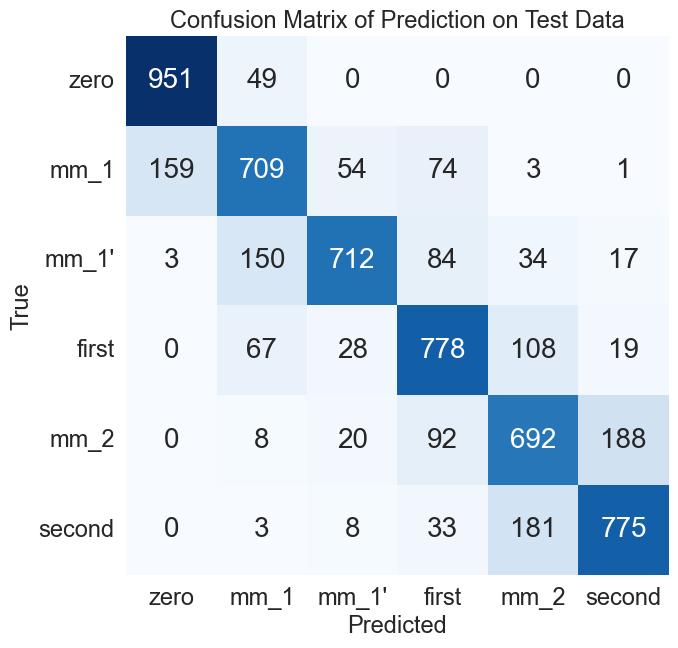

In [13]:
# show confusion matrix
plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(y_test, y_pred, labels=class_list)
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False)
tick_marks = np.arange(len(class_list)) + 0.5
if class_num == 6:
    class_list = ['zero', 'mm_1', 'mm_1\'', 'first', 'mm_2', 'second']
plt.xticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.yticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('True', fontsize=17)
plt.title(f'Confusion Matrix of Prediction on Test Data', fontsize=17)
plt.show()

# plt.savefig(f'./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png', bbox_inches='tight')
# print(f'Confusion matrix saved at ./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png')

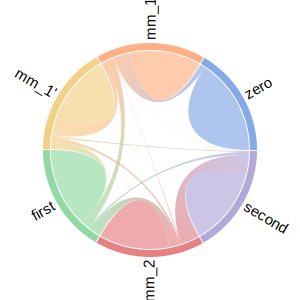

<Figure size 600x600 with 0 Axes>

In [14]:
# show chord diagram
import openchord as ocd

plt.figure(figsize=(6, 6))
fig = ocd.Chord(cm, class_list, radius=100)
fig.font_size = 15

fig.colormap = ['#79A1E3', '#FFA878', '#F3CA79', '#88D59A', '#E37275', '#AB9FD6']

fig.show()

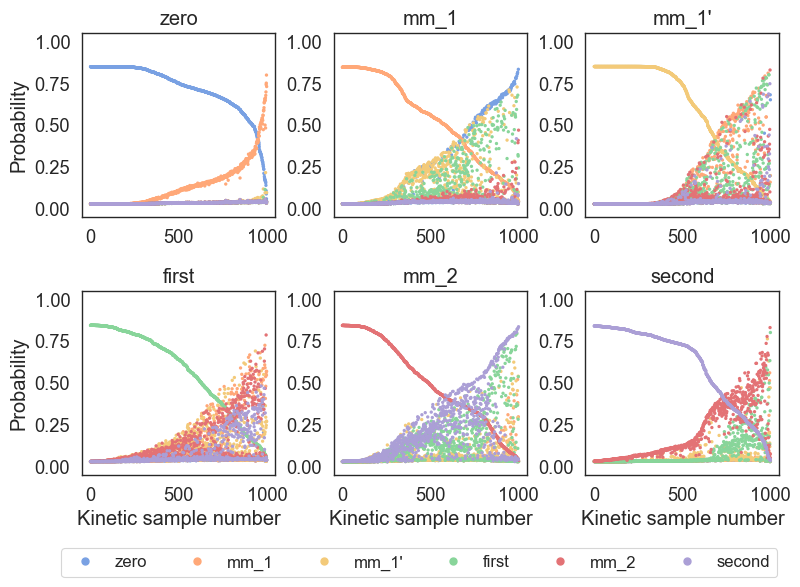

In [15]:
y_proba = y_proba[['zero', 'mm_1', 'mm_1_out', 'first', 'mm_2', 'second']]
y_proba['class'] = test_merge_data['class']

def plot_scatter_figs(data, ax):
    sns.scatterplot(data=data['zero'], ax=ax, legend=False, marker='.', edgecolor='none', color='#79A1E3')
    sns.scatterplot(data=data['mm_1'], ax=ax, legend=False, marker='.', edgecolor='none', color='#FFA878')
    sns.scatterplot(data=data['mm_1_out'], ax=ax, legend=False, marker='.', edgecolor='none', color='#F3CA79')
    sns.scatterplot(data=data['first'], ax=ax, legend=False, marker='.', edgecolor='none', color='#88D59A')
    sns.scatterplot(data=data['mm_2'], ax=ax, legend=False, marker='.', edgecolor='none', color='#E37275')
    sns.scatterplot(data=data['second'], ax=ax, legend=False, marker='.', edgecolor='none', color='#AB9FD6')

# 6 figs
fig, axes = plt.subplots(2, 3, figsize=(9, 6.5))
axes = axes.flatten()
from matplotlib.lines import Line2D

# zero
df_zero = y_proba[y_proba['class'] == 'zero']
df_zero = df_zero.sort_values(by=['zero', 'mm_1', 'mm_1_out', 'first', 'mm_2', 'second', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_zero, axes[0])
axes[0].set_title('zero')

# mm_1
df_mm_1 = y_proba[y_proba['class'] == 'mm_1']
df_mm_1 = df_mm_1.sort_values(by=['mm_1', 'mm_1_out', 'first', 'mm_2', 'second', 'zero', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_1, axes[1])
axes[1].set_title('mm_1')

# mm_1_out
df_mm_1_out = y_proba[y_proba['class'] == 'mm_1_out']
df_mm_1_out = df_mm_1_out.sort_values(by=['mm_1_out', 'first', 'mm_2', 'second', 'zero', 'mm_1', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_1_out, axes[2])
axes[2].set_title('mm_1\'')

# first
df_first = y_proba[y_proba['class'] == 'first']
df_first = df_first.sort_values(by=['first', 'mm_2', 'second', 'zero', 'mm_1', 'mm_1_out', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_first, axes[3])
axes[3].set_title('first')

# mm_2
df_mm_2 = y_proba[y_proba['class'] == 'mm_2']
df_mm_2 = df_mm_2.sort_values(by=['mm_2', 'second', 'zero', 'mm_1', 'mm_1_out', 'first', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_2, axes[4])
axes[4].set_title('mm_2')

# second
df_second = y_proba[y_proba['class'] == 'second']
df_second = df_second.sort_values(by=['second', 'zero', 'mm_1', 'mm_1_out', 'first', 'mm_2', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_second, axes[5])
axes[5].set_title('second')


custom_handles = [
    Line2D([0], [0], color='#79A1E3', marker='.', markersize=10, linestyle='none', label='zero'),
    Line2D([0], [0], color='#FFA878', marker='.', markersize=10, linestyle='none', label='mm_1'),
    Line2D([0], [0], color='#F3CA79', marker='.', markersize=10, linestyle='none', label='mm_1\''),
    Line2D([0], [0], color='#88D59A', marker='.', markersize=10, linestyle='none', label='first'),
    Line2D([0], [0], color='#E37275', marker='.', markersize=10, linestyle='none', label='mm_2'),
    Line2D([0], [0], color='#AB9FD6', marker='.', markersize=10, linestyle='none', label='second')
]
fig.legend(
    handles=custom_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.1),
    ncols=6,
    fontsize=12,
)

plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.2)
# ylim
for ax in axes:
    ax.set_ylim(-0.05, 1.05)
# no ylabel
for ax in axes:
    ax.set_ylabel('')
axes[0].set_ylabel('Probability')
axes[3].set_ylabel('Probability')
for ax in axes[3:]:
    ax.set_xlabel('Kinetic sample number')

## 3. Benchmark with data size
- 5_class
- sp_mode: `s`
- feat: `tsfresh_raw`
- ag_train_quality: `medium_quality`
- hours: `0.2`

In [16]:
class_list = [
    'zero',
    'mm_1',
    'first',
    'mm_2',
    'second',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'medium_quality'
hours = 0.2
label_col = 'class'
random_seed = 29

train_val_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'train_val_tsfresh_feat.csv'))
train_val_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'train_val.csv'))
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
train_val_raw_data.drop(columns=['class'], inplace=True)
test_raw_data.drop(columns=['class'], inplace=True)
train_val_tsfresh_data.drop(columns=[c for c in train_val_tsfresh_data.columns if c.startswith('p')], inplace=True)
train_val_raw_data.drop(columns=[c for c in train_val_raw_data.columns if c.startswith('p')], inplace=True)
test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)

train_val_merge_data = pd.merge(train_val_tsfresh_data, train_val_raw_data, on='id')
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')

train_val_merge_data = train_val_merge_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
test_merge_data = test_merge_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
train_val_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)

train_val_merge_data.head()

s__variance_larger_than_standard_deviation  s__has_duplicate_max  \
0                                         0.0                   0.0   
1                                         0.0                   0.0   
2                                         0.0                   0.0   
3                                         0.0                   0.0   
4                                         0.0                   0.0   

   s__has_duplicate_min  s__has_duplicate  s__sum_values  s__abs_energy  \
0                   0.0               0.0      18.091769      12.474767   
1                   0.0               0.0       7.300260       3.281100   
2                   0.0               0.0      12.546217       8.393346   
3                   0.0               0.0      12.521292       6.962470   
4                   0.0               0.0      18.003839      12.020166   

   s__mean_abs_change  s__mean_change  s__mean_second_derivative_central  \
0            0.027229       -0.027028                           0.000460   
1            0.031559       -0.031559                           0.003658   
2            0.034482       -0.034482                           0.000913   
3            0.029466       -0.029466                           0.001362   
4            0.024158       -0.023312                           0.000369   

   s__median  ...       s21       s22       s23       s24       s25       s26  \
0   0.595620  ...  0.430557  0.418073  0.379813  0.352792  0.332834  0.290929   
1   0.141863  ...  0.104415  0.100995  0.097952  0.095208  0.092730  0.090473   
2   0.394682  ...  0.138799  0.102116  0.067488  0.036743  0.013823  0.003055   
3   0.342842  ...  0.229976  0.216824  0.204531  0.193033  0.182267  0.172179   
4   0.568231  ...  0.437412  0.416398  0.403830  0.381231  0.393492  0.358651   

        s27       s28       s29           old_class  
0  0.270558  0.253065  0.226550          mm__single  
1  0.088422  0.086524  0.084781  mm__double_outside  
2  0.000495  0.000076  0.000012          mm__single  
3  0.162712  0.153831  0.145485           1__double  
4  0.354755  0.332843  0.316394           1__single  

[5 rows x 838 columns]

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

all_data = pd.concat([train_val_merge_data, test_merge_data], ignore_index=True)
data_size_list = [
    500,
    1000,
    2000,
    5000,
    10000,
]
test_result_df = pd.DataFrame(columns=['Data_Size', 'Accuracy', 'MCC'])
repeat_num = 5
pbar = tqdm(total=len(data_size_list) * repeat_num)
for data_size in data_size_list:
    for repeat in range(repeat_num):
        try:
            sample_data = train_test_split(all_data, train_size=data_size, shuffle=True, stratify=all_data['old_class'], )[0]
        except ValueError:
            sample_data = train_test_split(all_data, train_size=data_size, shuffle=True, stratify=all_data['class'], )[0]
        try:
            train_val_merge_data_, test_merge_data_ = train_test_split(sample_data, test_size=0.1, shuffle=True, stratify=sample_data['old_class'], )
        except ValueError:
            train_val_merge_data_, test_merge_data_ = train_test_split(sample_data, test_size=0.1, shuffle=True, stratify=sample_data['class'], )
        # print(train_val_merge_data_.shape, test_merge_data_.shape)

        metric = 'accuracy'

        predictor = TabularPredictor(
            problem_type='multiclass',
            label=label_col,
            learner_kwargs={'ignored_columns': ['id', 'old_class']},
            eval_metric=metric,
            path=f'./AutogluonModels/{str(class_num)}_class/{data_size}__{repeat}/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h',
            verbosity=0,
        ).fit(
            train_data=train_val_merge_data_,
            num_gpus=1,
            num_cpus=5,
            presets=ag_train_quality,
            time_limit=60*60*hours,
        )
        test_result = predictor.evaluate(test_merge_data_)
        test_result_df.loc[len(test_result_df)] = [data_size, test_result['accuracy'], test_result['mcc']]

        pbar.update(1)

In [18]:
test_result_df

Data_Size  Accuracy       MCC
0       500.0     0.660  0.581134
1       500.0     0.640  0.554735
2       500.0     0.640  0.554735
3       500.0     0.640  0.554735
4       500.0     0.660  0.577023
5      1000.0     0.720  0.654812
6      1000.0     0.710  0.639135
7      1000.0     0.700  0.628809
8      1000.0     0.750  0.690981
9      1000.0     0.740  0.678565
10     2000.0     0.725  0.657368
11     2000.0     0.730  0.664570
12     2000.0     0.725  0.657967
13     2000.0     0.705  0.633154
14     2000.0     0.735  0.670145
15     5000.0     0.776  0.720840
16     5000.0     0.778  0.723140
17     5000.0     0.776  0.720840
18     5000.0     0.776  0.720667
19     5000.0     0.784  0.730907
20    10000.0     0.763  0.704326
21    10000.0     0.763  0.704326
22    10000.0     0.763  0.704326
23    10000.0     0.763  0.704326
24    10000.0     0.763  0.704326

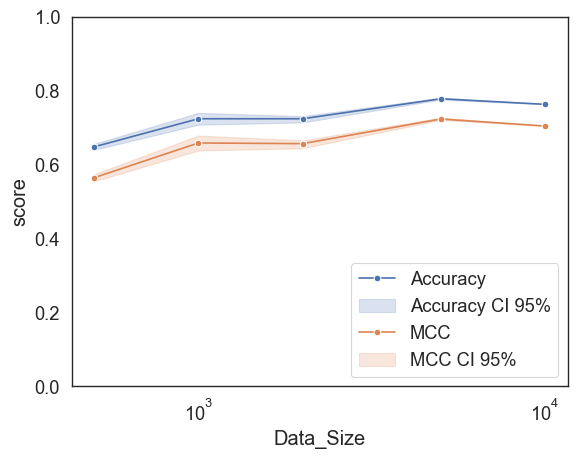

In [19]:
sns.lineplot(data=test_result_df, x='Data_Size', y='Accuracy', marker='o', 
             errorbar=('ci', 95),
             err_style='band',)
sns.lineplot(data=test_result_df, x='Data_Size', y='MCC', marker='o', 
             errorbar=('ci', 95),
             err_style='band',)

# plt.fill_between
plt.xscale('log')
plt.legend(['Accuracy', 'Accuracy CI 95%', 'MCC', 'MCC CI 95%'], loc='lower right')
plt.ylim(0, 1)
plt.ylabel('score')
plt.show()

## 4. Benchmark with feature
- using 5_class data
- features:
    1. tsfresh + raw
    2. raw
    3. tsfresh

In [26]:
class_list = [
    'zero',
    'mm_1',
    'first',
    'mm_2',
    'second',
]
class_num = len(class_list)
ag_model_root = './AutogluonModels/'
sp_mode = 's'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 29

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column
test_merge_data_nolabel.head()

s__variance_larger_than_standard_deviation  s__has_duplicate_max  \
0                                         0.0                   0.0   
1                                         0.0                   0.0   
2                                         0.0                   0.0   
3                                         0.0                   0.0   
4                                         0.0                   0.0   

   s__has_duplicate_min  s__has_duplicate  s__sum_values  s__abs_energy  \
0                   0.0               0.0      16.530268      10.374318   
1                   0.0               0.0      17.815432      12.024061   
2                   0.0               0.0      18.811441      13.002282   
3                   0.0               0.0      19.052132      13.271251   
4                   0.0               0.0      20.397375      14.671602   

   s__mean_abs_change  s__mean_change  s__mean_second_derivative_central  \
0            0.024521       -0.024521                           0.000760   
1            0.025673       -0.025673                           0.000524   
2            0.032339       -0.024105                           0.000835   
3            0.022703       -0.022703                           0.000388   
4            0.021092       -0.019204                           0.000494   

   s__median  ...       s21       s22       s23       s24       s25       s26  \
0   0.503447  ...  0.388283  0.373725  0.359855  0.346628  0.334006  0.321955   
1   0.579836  ...  0.432948  0.399767  0.370342  0.352634  0.341384  0.316879   
2   0.617662  ...  0.492373  0.425088  0.467610  0.444554  0.380581  0.386003   
3   0.621887  ...  0.482701  0.464106  0.440184  0.420695  0.391474  0.388177   
4   0.656110  ...  0.565020  0.541818  0.528279  0.508838  0.505728  0.471300   

        s27       s28       s29  old_class  
0  0.310440  0.299428  0.288894  0__double  
1  0.292607  0.275896  0.257577  0__double  
2  0.360607  0.318404  0.313484  0__double  
3  0.358763  0.343232  0.334545  0__double  
4  0.461177  0.469872  0.453205  0__double  

[5 rows x 837 columns]

In [55]:
df_results = pd.DataFrame(columns=['Feature', 'Metrics', 'Score'])
for feat in ['tsfresh_raw', 'raw', 'tsfresh']:
    model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
    predictor = TabularPredictor.load(model_root)
    
    # predict on test data
    y_pred = predictor.predict(test_merge_data_nolabel)
    y_proba = predictor.predict_proba(test_merge_data_nolabel)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    top2_accuracy = top_k_accuracy_score(y_test, y_proba, k=2)
    top3_accuracy = top_k_accuracy_score(y_test, y_proba, k=3)

    df_results.loc[len(df_results)] = [feat, 'Accuracy', accuracy]
    df_results.loc[len(df_results)] = [feat, 'ROC_AUC', roc_auc]
    df_results.loc[len(df_results)] = [feat, 'MCC', mcc]
    df_results.loc[len(df_results)] = [feat, 'F1', f1]
    df_results.loc[len(df_results)] = [feat, 'Precision', precision]
    df_results.loc[len(df_results)] = [feat, 'Recall', recall]
    df_results.loc[len(df_results)] = [feat, 'Top2_Accuracy', top2_accuracy]
    df_results.loc[len(df_results)] = [feat, 'Top3_Accuracy', top3_accuracy]

df_results

Feature        Metrics     Score
0   tsfresh_raw       Accuracy  0.788200
1   tsfresh_raw        ROC_AUC  0.964153
2   tsfresh_raw            MCC  0.735854
3   tsfresh_raw             F1  0.786100
4   tsfresh_raw      Precision  0.786697
5   tsfresh_raw         Recall  0.788200
6   tsfresh_raw  Top2_Accuracy  0.957600
7   tsfresh_raw  Top3_Accuracy  0.997000
8           raw       Accuracy  0.772400
9           raw        ROC_AUC  0.959552
10          raw            MCC  0.716030
11          raw             F1  0.770632
12          raw      Precision  0.771254
13          raw         Recall  0.772400
14          raw  Top2_Accuracy  0.948000
15          raw  Top3_Accuracy  0.997200
16      tsfresh       Accuracy  0.789400
17      tsfresh        ROC_AUC  0.963690
18      tsfresh            MCC  0.737305
19      tsfresh             F1  0.787267
20      tsfresh      Precision  0.787582
21      tsfresh         Recall  0.789400
22      tsfresh  Top2_Accuracy  0.958400
23      tsfresh  Top3_Accuracy  0.997000

(0.5, 1.0)

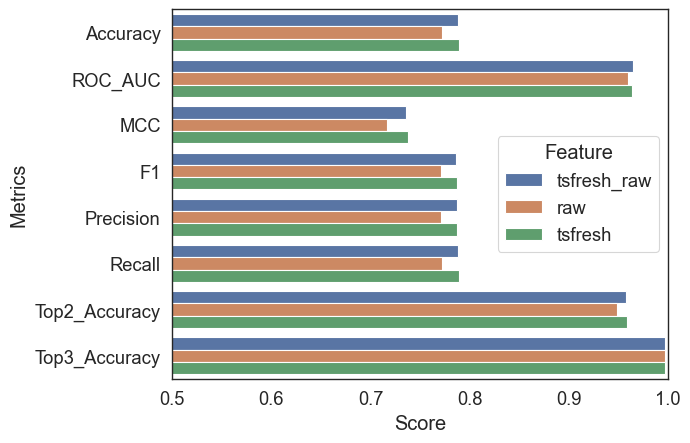

In [56]:
fig = sns.barplot(data=df_results, x='Score', y='Metrics', hue='Feature', legend=True)

custom_handles = [
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh_raw'),
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='raw'),
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh'),
]

fig.set_xlim(0.5, 1)